In [1]:
import warnings 

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import *
from pprint import pprint
import re
sns.set()
sns.set_context('poster')
import random
import os
# from tqdm import tqdm as t

# from sklearn import linear_model as lm

from IPython.display import display, Latex, Markdown, HTML
import ipywidgets as widgets
from ipywidgets import interact
import nbinteract as nbi
pd.options.display.max_rows = 7

# Titanic Data Analysis

In [23]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


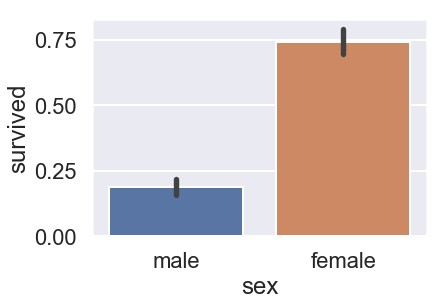

In [4]:
sns.barplot(x='sex', y='survived', data=df)

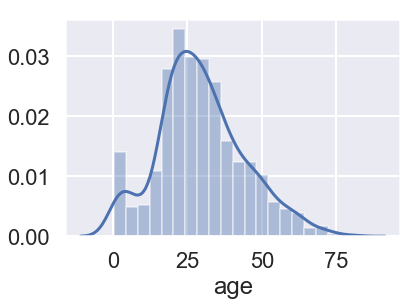

In [6]:
sns.distplot(df['age'].dropna())

(0, 5)

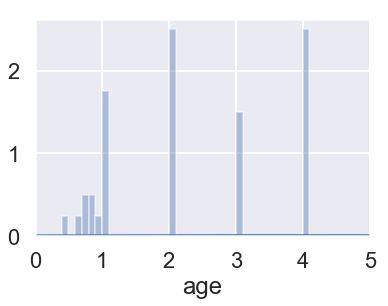

In [9]:
sns.distplot(df['age'].dropna(), bins=np.arange(0, 5, 0.1))
plt.xlim(0, 5)

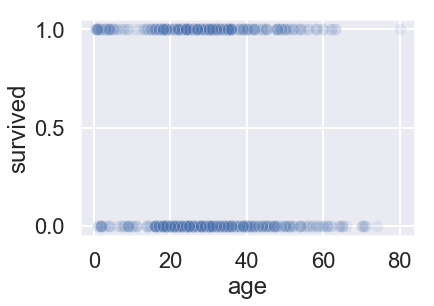

In [12]:
sns.scatterplot(x='age', y='survived', data=df, alpha=0.1)

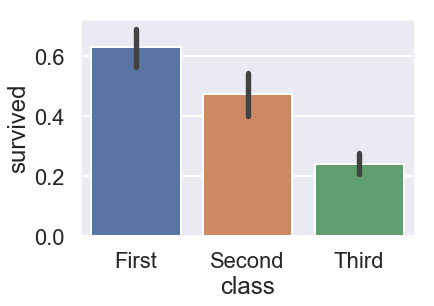

In [13]:
sns.barplot(x='class', y='survived', data=df)

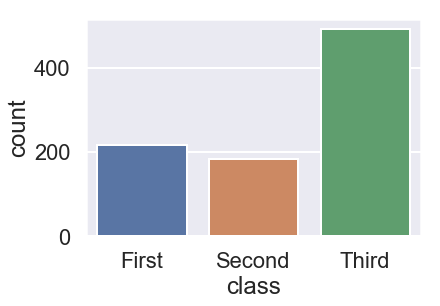

In [15]:
sns.countplot(x='class', data=df)

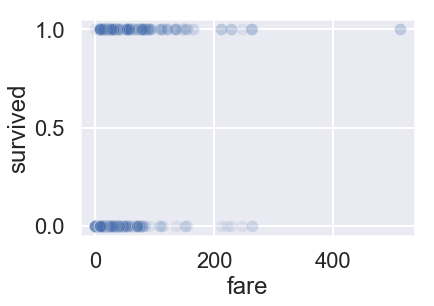

In [16]:
sns.scatterplot(x='fare', y='survived', data=df, alpha=0.1)

## Build a Model

In [25]:
columns = ['sex', 'age', 'class', 'fare', 'survived']
x_columns = ['sex', 'age', 'class', 'fare']

clean = df[columns].dropna()
clean

,sex,age,class,fare,survived
0,male,22.0,Third,7.2500,0
1,female,38.0,First,71.2833,1
2,female,26.0,Third,7.9250,1
...,...,...,...,...,...
887,female,19.0,First,30.0000,1
889,male,26.0,First,30.0000,1
890,male,32.0,Third,7.7500,0


In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

enc = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False), [0, 2]),
    ('rest', 'passthrough', [1, 3])
])
X = enc.fit_transform(clean[x_columns])
X

array([[ 0.    ,  1.    ,  0.    , ...,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    , 38.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  1.    , 26.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  1.    , ...,  0.    , 19.    , 30.    ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    , 26.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  1.    , 32.    ,  7.75  ]])

In [43]:
y = clean['survived']
y

0      0
1      1
2      1
      ..
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [59]:
clf.score(X, y)

0.7955182072829131

In [60]:
clf.coef_

array([[ 1.1822567 , -1.15443418,  1.07975027,  0.04615111, -1.09807887,
        -0.0328135 ,  0.00179715]])